In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
import time
from datetime import datetime
from config import weather_api_key
import requests

In [2]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [3]:
#  random lat/long sets
lats = np.random.uniform(low= -90.000, high=90.000, size=1500)
longs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lats_longs = list(zip(lats, longs))
lats_longs

[(-76.02910736550045, 41.83496279787806),
 (3.01906980330034, 26.58584519742078),
 (-73.83172487160189, -170.94525360458803),
 (8.238399044515788, 35.46718421948313),
 (-20.48572384174082, -75.40302761101668),
 (-58.05475550206775, -115.59318836639032),
 (-86.4695498146926, 72.49639744130849),
 (-85.37864778211164, -177.61330881237564),
 (47.3735921759596, -10.454967741809838),
 (10.061212343008904, 170.0516846113975),
 (-75.78403844947564, 110.02606034417062),
 (-18.4340147860827, -51.997644176954964),
 (-59.76420829223662, -77.18325640463057),
 (-27.49836557384083, -125.72583133929427),
 (-59.172204766363706, -58.608796927654566),
 (-13.558492468713368, -23.9556333503065),
 (-70.64741972806053, 42.532638426495936),
 (-46.666949012417376, -7.405121916259645),
 (63.0912759854034, 162.5042122273925),
 (69.67174789121293, -149.10035461607134),
 (52.696562062892184, -27.154988299854068),
 (-60.979070129662084, 55.01561311903285),
 (-11.707188867518354, -172.7162736726894),
 (57.1053834877

In [4]:
# Create a list to hold cities
cities = []

# identify each city nearest to each set of coordinates
for coordinates in lats_longs:
    city = citipy.nearest_city(coordinates[0], coordinates[1]).city_name
    
    if city not in cities:
        cities.append(city)
len(cities)

596

In [5]:
# 1. Create empty city list to hold cities
city_data = []

# print the start of logging
print("Beginning Data Retrieval")
print("------------------------")

# create counters for looping through cities
record_count = 1
set_count = 1

# 2. loop through cities
for i, city in enumerate(cities):
    # 3. group cities in sets of 50
    if (i % 50 == 0 and i >=50):
        set_count += 1
        record_count += 1
        time.sleep(60)

# 4. build city url endpoint for each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # 5. log the url and record/set numbers
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # add 1 to record count
    record_count += 1
    
    # 6. Run an API request for each of the cities.
    try:
        # 6. Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # 7. Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # 8. Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval
------------------------
Processing Record 1 of Set 1 | port alfred
Processing Record 2 of Set 1 | isiro
Processing Record 3 of Set 1 | vaini
Processing Record 4 of Set 1 | gore
Processing Record 5 of Set 1 | camana
Processing Record 6 of Set 1 | rikitea
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | skibbereen
Processing Record 9 of Set 1 | butaritari
Processing Record 10 of Set 1 | albany
Processing Record 11 of Set 1 | jatai
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | georgetown
Processing Record 15 of Set 1 | saldanha
Processing Record 16 of Set 1 | evensk
Processing Record 17 of Set 1 | college
Processing Record 18 of Set 1 | grindavik
Processing Record 19 of Set 1 | sataua
City not found. Skipping...
Processing Record 20 of Set 1 | provideniya
Processing Record 21 of Set 1 | esperance
Processing Record 22 of Set 1 | torbay
Processi

Processing Record 190 of Set 4 | malwan
City not found. Skipping...
Processing Record 191 of Set 4 | pasaje
Processing Record 192 of Set 4 | paka
Processing Record 193 of Set 4 | pimentel
Processing Record 194 of Set 4 | banda aceh
Processing Record 195 of Set 4 | east london
Processing Record 196 of Set 4 | mar del plata
Processing Record 197 of Set 4 | vaitupu
City not found. Skipping...
Processing Record 198 of Set 4 | nam tha
City not found. Skipping...
Processing Record 199 of Set 4 | carhuamayo
Processing Record 200 of Set 4 | smithers
Processing Record 201 of Set 4 | haverfordwest
Processing Record 202 of Set 4 | puri
Processing Record 203 of Set 4 | yulara
Processing Record 205 of Set 5 | luderitz
Processing Record 206 of Set 5 | ulundi
Processing Record 207 of Set 5 | catamarca
Processing Record 208 of Set 5 | rockland
Processing Record 209 of Set 5 | morgan city
Processing Record 210 of Set 5 | berlevag
Processing Record 211 of Set 5 | saskylakh
Processing Record 212 of Set 5

Processing Record 383 of Set 8 | namibe
Processing Record 384 of Set 8 | maryborough
Processing Record 385 of Set 8 | kostroma
Processing Record 386 of Set 8 | korla
Processing Record 387 of Set 8 | koubia
Processing Record 388 of Set 8 | nara
Processing Record 389 of Set 8 | kaitangata
Processing Record 390 of Set 8 | constantine
Processing Record 391 of Set 8 | am timan
Processing Record 392 of Set 8 | tartki
City not found. Skipping...
Processing Record 393 of Set 8 | leh
Processing Record 394 of Set 8 | itaituba
Processing Record 395 of Set 8 | sotara
City not found. Skipping...
Processing Record 396 of Set 8 | jalu
Processing Record 397 of Set 8 | mogadishu
Processing Record 398 of Set 8 | carroll
Processing Record 399 of Set 8 | erzin
Processing Record 400 of Set 8 | louisbourg
City not found. Skipping...
Processing Record 401 of Set 8 | berdigestyakh
Processing Record 402 of Set 8 | sidi ali
Processing Record 403 of Set 8 | mata
Processing Record 404 of Set 8 | pauini
Processing

Processing Record 569 of Set 12 | chachapoyas
Processing Record 570 of Set 12 | iberia
Processing Record 571 of Set 12 | vreed en hoop
City not found. Skipping...
Processing Record 572 of Set 12 | chorbog
City not found. Skipping...
Processing Record 573 of Set 12 | agropoli
Processing Record 574 of Set 12 | requena
Processing Record 575 of Set 12 | sampit
Processing Record 576 of Set 12 | san andres
Processing Record 577 of Set 12 | barcelos
Processing Record 578 of Set 12 | joao pessoa
Processing Record 579 of Set 12 | zunyi
Processing Record 580 of Set 12 | novyy urengoy
Processing Record 581 of Set 12 | muli
Processing Record 582 of Set 12 | andselv
City not found. Skipping...
Processing Record 583 of Set 12 | northam
Processing Record 584 of Set 12 | saint george
Processing Record 585 of Set 12 | san patricio
Processing Record 586 of Set 12 | vila velha
Processing Record 587 of Set 12 | necochea
Processing Record 588 of Set 12 | saint anthony
Processing Record 589 of Set 12 | teva

In [6]:
# convert the array of JSON dict into dataframe
city_data_df = pd.DataFrame(city_data)
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Alfred,-33.5906,26.8910,68.18,87,0,5.97,ZA,2022-05-04 15:48:24
1,Isiro,2.7739,27.6160,75.78,71,76,2.68,CD,2022-05-04 15:48:25
2,Vaini,-21.2000,-175.2000,71.76,94,20,3.44,TO,2022-05-04 15:48:25
3,Gore,-46.1028,168.9436,46.22,91,2,2.39,NZ,2022-05-04 15:48:26
4,Camana,-16.6228,-72.7111,70.48,76,82,7.96,PE,2022-05-04 15:48:26


In [7]:
# reorder columns
city_data2_df = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data2_df = city_data_df[city_data2_df]

In [8]:
city_data2_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-05-04 15:48:24,-33.5906,26.8910,68.18,87,0,5.97
1,Isiro,CD,2022-05-04 15:48:25,2.7739,27.6160,75.78,71,76,2.68
2,Vaini,TO,2022-05-04 15:48:25,-21.2000,-175.2000,71.76,94,20,3.44
3,Gore,NZ,2022-05-04 15:48:26,-46.1028,168.9436,46.22,91,2,2.39
4,Camana,PE,2022-05-04 15:48:26,-16.6228,-72.7111,70.48,76,82,7.96
5,Rikitea,PF,2022-05-04 15:47:26,-23.1203,-134.9692,77.68,81,61,20.02
6,Skibbereen,IE,2022-05-04 15:48:27,51.5500,-9.2667,58.10,70,84,11.27
7,Butaritari,KI,2022-05-04 15:48:28,3.0707,172.7902,79.84,81,31,10.51
8,Albany,US,2022-05-04 15:45:39,42.6001,-73.9662,52.38,92,100,5.46
9,Jatai,BR,2022-05-04 15:48:28,-17.8814,-51.7144,66.94,79,100,6.08


In [9]:
# create file output and save city_data2_df in the csv
save_file = "weather_data/cities.csv"
city_data2_df.to_csv(save_file, index_label="City ID")

In [10]:
# begin plotting from dataframe; start with lat vs max temp
lats = city_data2_df["Lat"]
max_temp = city_data2_df["Max Temp"]
humidity = city_data2_df["Humidity"]
clouds = city_data2_df["Cloudiness"]
wind_speed = city_data2_df["Wind Speed"]

today = time.strftime("%x")
today


'05/04/22'

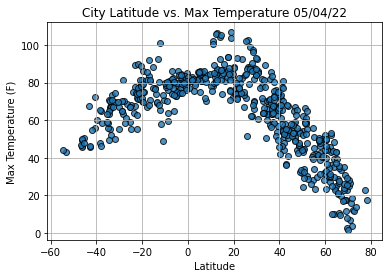

In [11]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_maxtemp.png")

# Show plot.
plt.show()

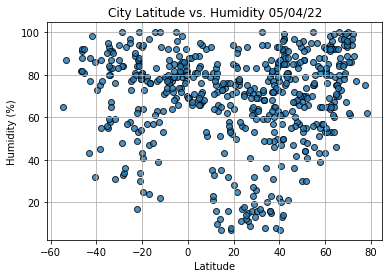

In [12]:
# scatter plot for latitude and humidity
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_humidity.png")

# Show plot.
plt.show()

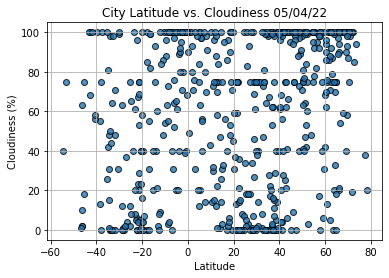

In [13]:
# plot latitude v. cloudiness
plt.scatter(lats,
            clouds,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_cloudiness.png")

# Show plot.
plt.show()

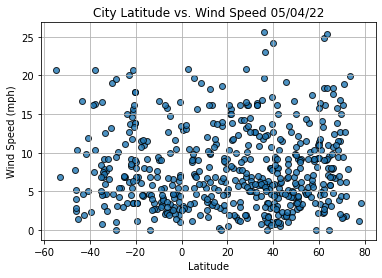

In [14]:
# plot lat v windspeed
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Format graph.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_v_windspeed.png")

# Show plot.
plt.show()

In [27]:
# import linregress
from scipy.stats import linregress

# create a function to perform linear regression and plot a regression line/equation with data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # regression on N, S hemisphere data
    (slope, intercept, r_value, p_value, std_err) = linregress(lats, max_temp)
    
    # calculate regression for y values from slope and intercept
    regress_values = x_values * slope + intercept
    
    # get line equation
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # create scatter plot and add regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # format and annotate
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="navy")
    plt.title(title)
    plt.xlabel("Latitude")
    plt.ylabel(y_label)
    plt.show()

In [41]:
# call the function with given parameters for northern/southern hemispheres
# create northern and southern dataframes by using loc on the city_data2_df

# index10 = city_data2_df.loc[10]
# index10

n_hemi_df = city_data2_df.loc[(city_data2_df["Lat"] >= 0)]
n_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Isiro,CD,2022-05-04 15:48:25,2.7739,27.6160,75.78,71,76,2.68
6,Skibbereen,IE,2022-05-04 15:48:27,51.5500,-9.2667,58.10,70,84,11.27
7,Butaritari,KI,2022-05-04 15:48:28,3.0707,172.7902,79.84,81,31,10.51
8,Albany,US,2022-05-04 15:45:39,42.6001,-73.9662,52.38,92,100,5.46
12,Georgetown,MY,2022-05-04 15:45:02,5.4112,100.3354,84.15,84,20,3.44
14,Evensk,RU,2022-05-04 15:48:30,61.9500,159.2333,30.15,94,100,2.21
15,College,US,2022-05-04 15:48:31,64.8569,-147.8028,42.80,70,75,5.75
16,Grindavik,IS,2022-05-04 15:48:31,63.8424,-22.4338,39.15,60,75,8.05
17,Provideniya,RU,2022-05-04 15:48:32,64.3833,-173.3000,23.95,92,70,9.57
19,Torbay,CA,2022-05-04 15:45:16,47.6666,-52.7314,43.88,85,100,12.66


In [42]:
s_hemi_df = city_data2_df.loc[(city_data2_df["Lat"] < 0)]
s_hemi_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Alfred,ZA,2022-05-04 15:48:24,-33.5906,26.8910,68.18,87,0,5.97
2,Vaini,TO,2022-05-04 15:48:25,-21.2000,-175.2000,71.76,94,20,3.44
3,Gore,NZ,2022-05-04 15:48:26,-46.1028,168.9436,46.22,91,2,2.39
4,Camana,PE,2022-05-04 15:48:26,-16.6228,-72.7111,70.48,76,82,7.96
5,Rikitea,PF,2022-05-04 15:47:26,-23.1203,-134.9692,77.68,81,61,20.02
9,Jatai,BR,2022-05-04 15:48:28,-17.8814,-51.7144,66.94,79,100,6.08
10,Punta Arenas,CL,2022-05-04 15:48:29,-53.1500,-70.9167,42.82,87,75,6.91
11,Ushuaia,AR,2022-05-04 15:48:29,-54.8000,-68.3000,44.22,65,40,20.71
13,Saldanha,ZA,2022-05-04 15:48:30,-33.0117,17.9442,73.45,91,64,7.61
18,Esperance,AU,2022-05-04 15:48:32,-33.8667,121.9000,55.24,58,98,7.94


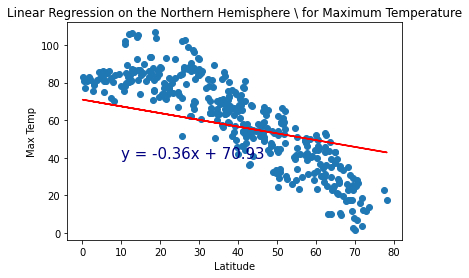

In [51]:
# perform linear regression on n_hemi_df
x_values = n_hemi_df["Lat"]
y_values = n_hemi_df["Max Temp"]

# call the function
plot_linear_regression(x_values, y_values,
                       "Linear Regression on the Northern Hemisphere \ 
                        for Maximum Temperature", "Max Temp",(10, 40))


In [55]:
# perform linear regression on s_hemi_df
x_values = s_hemi_df["Lat"]
y_values = s_hemi_df["Max Temp"]

# call function
plot_linear_regression(x_values, y_values,
                      "Linear Regression on Southern Hemisphere \ 
                       for Maximum Temperature", "Max Temp", (-50, 90))

SyntaxError: EOL while scanning string literal (2311788229.py, line 7)